# Portfolio optimization for the stocks Shell plc, BP plc, Microsoft and Apple using Markowitz Mean Variance Optimization and Expected utility theory methods

In this code we carry out portfolio optimization using the Markowitz mean-variance optimization and the expected utility theory techniques. For the mean variance optimization we solve the following programming problems:

$$
 minimize \quad \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_{ij},	
$$
subject to
$$
\bar{r}=\sum_{i=1}^{n} \overline{r}_i w_i ~\text{and}~ \sum_{i=1}^{n} w_i=1;
$$

which seeks to find the portfolio which minimizes portfolio volatility, $\quad \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_{ij}$,  constrained by expected portfolio return and investment weights and


$$ 
maximize \quad \frac{\sum_{i=1}^{n} \overline{r}_i w_i} {\sqrt {\sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_{ij}}},
$$ 
such that $$\sum_{i=1}^{n} w_i=1$$



which maximizes the ratio of the expeted portfolio return to the portfolio volatilty. In this case, $w_i$ is the investment proportion of the investor's capital assigned to an asset $i$, $r_i$ is the asset rate of return, $r$ is portfolio rate of return, $\overline{r}_i$ is the mean return for asset $i$ , $\bar{r}$ is the portfolio expected return and $\sigma_{ij}$ is the covariance between assets $i$ and $j$.


For the expected utility theory we solve the following programming problem which seeks to maximize the expected utility of an utility for a quadratic utility function :

$$
 maximize \quad \mu_{p}-\frac{k}{2} \sigma^{2}_{p},
$$

where $\mu_p$ and $\sigma^{2}_p$ are portfolio expected return and volatility respectively.

We consider a case where an insurer has to allocate their wealth on the stocks of Microsoft, Shell, BP and Apple companies and use these stocks price data from Yahoo Finance dating from $01-01-2018$ to $14-05-2023.$


Markowitz Mean Variance Optimization

Using the pyfportifolioopt package

In [1]:
#Required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import expected_returns, risk_models, EfficientFrontier
from pypfopt import objective_functions
from pypfopt import plotting

##Using data from Yahoo finance ; these are  stock prices for the BP plc,SHELL plc, Microsoft 
##and Apple stocks which we convert to returns

##Import Yahoo Finance
import yfinance as yf

##Downloading the data from Yahoo Finance
dta=yf.download ("SHEL BP MSFT AAPL",start="2018-01-01",end="2023-05-14")

#create a dataframe of the four stocks
sh=dta['Adj Close']['SHEL']
bp=dta['Adj Close']['BP']
ms=dta['Adj Close']['MSFT']
ap=dta['Adj Close']['AAPL']
data=pd.DataFrame(sh.values,columns=['SHEL'])  
data['MSFT']=ms.values
data['AAPL']=ap.values
data['BP']=bp.values
data.index=sh.index

#compute asset/stock returns

#The simple returns 

simple_returns = data/ data.shift(1)

simple_returns.head(10)
    



/usr/local/lib/python3.9/dist-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/masked.py:59: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


[*********************100%***********************]  4 of 4 completed


,SHEL,MSFT,AAPL,BP
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,1.008084,1.004654,0.999826,1.011562
2018-01-04,1.004374,1.008802,1.004645,1.003965
2018-01-05,1.002177,1.012398,1.011385,1.001394
2018-01-08,1.000290,1.001021,0.996286,0.999536
2018-01-09,0.995801,0.999320,0.999885,0.995125
2018-01-10,1.003926,0.995466,0.999770,1.000700
2018-01-11,1.011587,1.002961,1.005680,1.008625
2018-01-12,1.014891,1.017257,1.010326,1.014791


In [3]:
#We use logarithmic returns because they are better computationaly and they can be used interchangeably 
#with the simple returns
dta_returns=data.pct_change().apply(lambda x: np.log(1+x))

#Drop all rows containing an NA
Returns=dta_returns.dropna(axis=0,how='any')   
Returns.head(10)

,SHEL,MSFT,AAPL,BP
Date,,,,
2018-01-03,0.008051,0.004643,-0.000174,0.011496
2018-01-04,0.004364,0.008763,0.004634,0.003958
2018-01-05,0.002175,0.012322,0.011321,0.001393
2018-01-08,0.000290,0.001020,-0.003721,-0.000464
2018-01-09,-0.004208,-0.000680,-0.000115,-0.004887
2018-01-10,0.003919,-0.004545,-0.000230,0.000700
2018-01-11,0.011521,0.002956,0.005664,0.008588
2018-01-12,0.014782,0.017110,0.010273,0.014683
2018-01-16,-0.012779,-0.014049,-0.005095,-0.033580


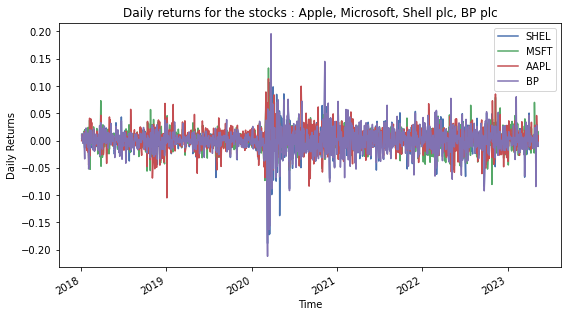

In [4]:
#plotting the asset returns
Returns.plot(figsize=(9,5))
plt.title('Daily returns for the stocks : Apple, Microsoft, Shell plc, BP plc')
plt.xlabel('Time')
plt.ylabel('Daily Returns')
plt.savefig('Returns.pdf')

plt.show()

In [5]:
##Getting the annual volatilities and annual expected returns of the assets

ann_volatility = data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_mean=data.resample('Y').last().pct_change().mean()

##Putting the annual voaltilities and returns in a table
assets_statistics = pd.concat([ann_mean, ann_volatility], axis=1) 
assets_statistics.columns = ['Returns', 'Volatility']
print(ann_volatility)
##Getting the latex code
print(assets_statistics.to_latex())

#The table
assets_statistics

SHEL    0.367136
MSFT    0.309723
AAPL    0.329292
BP      0.369698
dtype: float64
\begin{tabular}{lrr}
\toprule
{} &   Returns &  Volatility \\
\midrule
SHEL &  0.080955 &    0.367136 \\
MSFT &  0.307402 &    0.309723 \\
AAPL &  0.425426 &    0.329292 \\
BP   &  0.085126 &    0.369698 \\
\bottomrule
\end{tabular}



<ipython-input-5-a6e480fac84d>:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(assets_statistics.to_latex())


,Returns,Volatility
SHEL,0.080955,0.367136
MSFT,0.307402,0.309723
AAPL,0.425426,0.329292
BP,0.085126,0.369698


In [6]:
#Portfolio optimization using pyportfolioopt

# Calculate expected returns and covariance matrix

##The expected returns matrix
mu=data.resample('Y').last().pct_change().mean()

#The variance-covariance matrix
Sigma=Returns.cov()

#Defining the optimization problem
#The efficient frontier
ef = EfficientFrontier(mu, Sigma)

#optimal weights at minimimum variance
weights = ef.min_volatility()

#The weights array
weights = np.array(list(weights.values()))

#compute portfolio returns
returns_port=Returns@weights

#portfolio mean return 
portfolio_mean_return=weights.T@mu

#portfolio variance and standard deviation
port_var=weights.T@(Sigma@weights)
port_vol=np.sqrt(port_var)

#The results
print("Optimal weights:", weights)
print("Portfolio return:", portfolio_mean_return)
print("Portfolio volatility:", port_vol)






Optimal weights: [0.18101242 0.41398181 0.22838672 0.17661904]
Portfolio return: 0.25410938273480715
Portfolio volatility: 0.016784246851754614


In [7]:
# A table of the optimal weights
weights=pd.Series(weights)
opt_weights = pd.concat([weights], axis=1) 
opt_weights.columns = ['Optimal Weights']
opt_weights.index=assets_statistics.index
opt_weights
#print(opt_weights.to_latex())

,Optimal Weights
SHEL,0.181012
MSFT,0.413982
AAPL,0.228387
BP,0.176619


The sharpe ratio is the ratio of the porfolio return less the risk free rate return to the porfolio risk i.e the standard deviation:

$$
sharpe \,ratio=\frac{\mu_p-rf}{\sigma_p}
$$
where $\mu_p$ is the portfolio mean return, $rf$ is the riskless rate of return and $\sigma_p$ is the portfolio standard deviation.



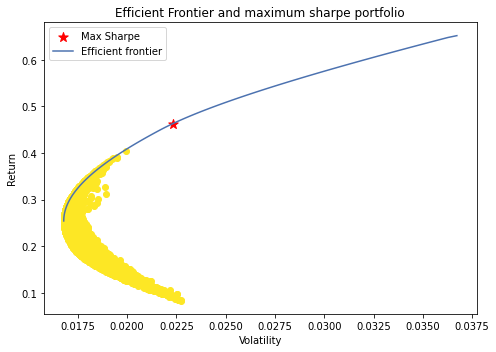

In [8]:
#Plotting the efficient frontier for a maximum sharpe ratio optimization
##We do this by looping over a set number of portfolios

#Number of assets
num_assets = len(data.columns)

#risk free rate
rf=0.001

#generated portfolios
num_portfolios = 10000

#the efficient frontier
ef = EfficientFrontier(mu, Sigma, weight_bounds=(None, None))
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()

# Find the maximum sharpe ratio portfolio 
ef_max_sharpe.max_sharpe()

#The mean return  and volatility of maximum sharpe portfolio
ret_sharpe, std_sharpe, _ = ef_max_sharpe.portfolio_performance()

# Plotting the maximu sharpe ratio portfolio
ax.scatter(std_sharpe, ret_sharpe, marker="*", s=100, c="r", label="Max Sharpe")

#Generating portfolios and plotting their volatilities and mean returns
for portfolio in range(num_portfolios):
     #random weights
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    
    #portfolio expected returns
    rets =weights.dot(ef.expected_returns)
    
    #portfolio variance
    var = weights @ ef.cov_matrix @ weights.T
    
    #portfolio volatility
    stds = np.sqrt(var)
 
    #portfolio sharpe ratio
    sharpes = (rets-rf) / stds
    
    #plotting the mean and volatility of portfolios
    ax.scatter(stds, rets, marker="o", c=sharpes, cmap="viridis_r")
fig.set_figheight(5)
fig.set_figwidth(7) 

#Plotting the efficient frontier
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)    
ax.set_title("Efficient Frontier and maximum sharpe portfolio")
ax.legend()
plt.tight_layout()
plt.savefig('Maximum sharpe portfolio.pdf')
plt.show()

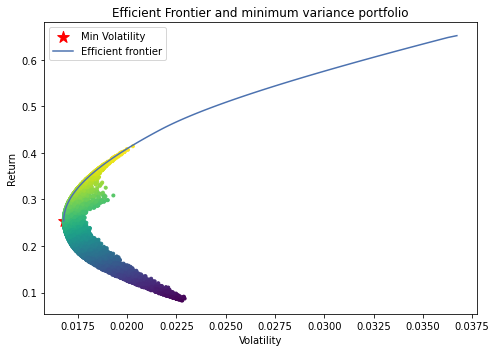

In [10]:

#Plotting the minimium variance frontier
num_assets = len(data.columns)

#risk-less return rate
rf=0.001

#number of portfolio simulations
num_ports = 10000

#The efficient frontier
ef1 = EfficientFrontier(mu, Sigma, weight_bounds=(None, None))

ef1_min_volatility=ef1.deepcopy()

# Find the minimum volatility portfolio

ef1_min_volatility.min_volatility()

#mean and volatility of minimum volatility portfolio
ret_minvol, std_minvol,_=ef1_min_volatility.portfolio_performance()

# Generate random portfolios
w = np.random.dirichlet(np.ones(ef.n_assets), num_ports)
rets1 = w.dot(ef1.expected_returns)
stds1 = np.sqrt(np.diag(w @ ef1.cov_matrix @ w.T))
sharpes1 = (rets1-rf) / stds1
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(7)
ax.scatter(std_minvol, ret_minvol, marker="*", s=150, c="r", label="Min Volatility")
ax.scatter(stds1, rets1, marker=".", c=sharpes1)
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=False)
ax.set_title("Efficient Frontier and minimum variance portfolio")
ax.legend()
plt.tight_layout()
plt.savefig("Minimum volatility.pdf")
plt.show()

In [11]:
### Alternatively the minimum volatility and maximum sharpe ratio portfolios can be plotted as below

#Initialize empty lists

# empty array for portfolio returns
p_ret = [] 
# empty array for portfolio volatility
p_vol = [] 

#  empty array for asset weights
p_weights = [] 


num_assets = len(data.columns)
num_portfolios = 10000


#Looping over 10000 simulatins

for portfolio in range(num_portfolios):
    
    #random weights
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    
    #portfolio returns
    returns =weights.T@mu 
    
    p_ret.append(returns)
    
    #portfolio variance
    var = weights.T@(Sigma@weights)
    
    #portfolio volatility
    sd = np.sqrt(var)
    
    # Annual standard deviation is the volatility
    ann_sd = sd*np.sqrt(252) 
    p_vol.append(ann_sd)

In [12]:
#create a dictionary for returns and volatility 
data1 = {'Returns':p_ret, 'Volatility':p_vol}

#append the weights for the stocks into  the dictionary
data1 = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(data.columns.tolist()):

    data1[symbol+' weight'] = [w[counter] for w in p_weights]
    
#the portfolios dataframe
portfolios  = pd.DataFrame(data1)
portfolios.head(10)

,Returns,Volatility,SHEL weight,MSFT weight,AAPL weight,BP weight
0,0.172691,0.288495,0.336220,0.252965,0.096206,0.314609
1,0.290789,0.270589,0.058943,0.458881,0.305350,0.176826
2,0.233046,0.268002,0.213121,0.370894,0.195027,0.220958
3,0.227691,0.278214,0.114659,0.139901,0.328964,0.416476
4,0.192302,0.284112,0.018972,0.272536,0.137164,0.571327
5,0.298126,0.271339,0.025887,0.344867,0.400975,0.228271
6,0.241266,0.267755,0.149032,0.535299,0.111010,0.204658
7,0.217152,0.282917,0.292347,0.079695,0.339498,0.288459
8,0.271298,0.269092,0.027796,0.288051,0.359273,0.324880
9,0.182958,0.279703,0.138160,0.442011,0.000470,0.419359


In [13]:
#The minimum variance portfolio

min_vol_portfolio = portfolios.iloc[portfolios['Volatility'].idxmin()]
                               
min_vol_portfolio

Returns        0.255186
Volatility     0.266454
SHEL weight    0.193934
MSFT weight    0.408549
AAPL weight    0.235256
BP weight      0.162261
Name: 6102, dtype: float64

In [14]:
# Finding the optimal risky portfolio by getting the maximum sharpe ratio portfolio as defined before
#The risk free rate 
rf = 0.001
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.405447
Volatility     0.315699
SHEL weight    0.019701
MSFT weight    0.109231
AAPL weight    0.870185
BP weight      0.000882
Name: 6285, dtype: float64

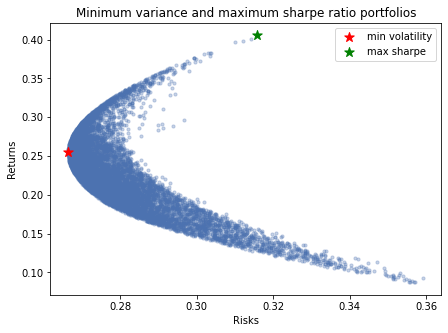

In [18]:
# Plotting minimum variance and optimalrisky portfolios using scatter ()
plt.subplots(figsize=(7, 5))

#plotting the returns against volatility
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)

#The minimum volatility portfolio
plt.scatter(min_vol_portfolio[1], min_vol_portfolio[0], color='r', marker='*', s=100, label='min volatility')


#The optimal risky portfolio
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=100, label='max sharpe')
plt.xlabel('Risks')
plt.ylabel('Returns')
plt.title('Minimum variance and maximum sharpe ratio portfolios')
plt.legend(loc='upper right')
plt.show()

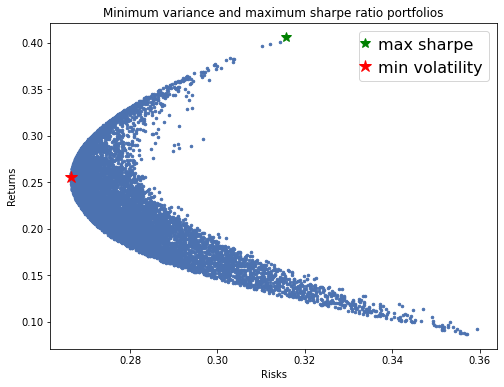

In [19]:
##Altenatively plotting the minimum variance and optimal risky assets using plt.plot()
#creating an array of the volatilities
vol1=np.array(p_vol)

#returns array
ret1=np.array(p_ret)

plt.figure(figsize=(8,6))

#plotting returns against standatd deviation
plt.plot(vol1,ret1,'.',markersize=5)

#The optimal risky portfolio
plt.plot(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*',markersize=10,label='max sharpe')

#The minimum variance portfolio
plt.plot(min_vol_portfolio[1], min_vol_portfolio[0], color='r', marker='*', markersize=12, label='min volatility')
plt.xlabel('Risks')
plt.ylabel('Returns')
plt.title('Minimum variance and maximum sharpe ratio portfolios')
plt.legend(handlelength=0,prop={'size': 16})
plt.savefig('combined portfolios MV.pdf')
plt.show()

Expected utility OptimiZation using scipy.optimize

In [20]:
#Required packages
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# number of assets
n_assets = len(data.columns)



# Define expected utility function where a quadratic utility function is used
def expected_utility(w, returns, risk_aversion):
    
    expected_return =w.T @ np.mean(returns, axis=0)
    
    variance = w.T @(np.cov(returns.T)@w)
 
    #Change of sign of the function because we need to maximize the expected utility
    utility =-expected_return + (0.5 * risk_aversion * variance) 
    return utility

#initial portfolio weights
w0 = np.ones(n_assets) / n_assets

# risk aversion 
risk_aversion = 6.8

#constraints
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# bounds
bounds = [(0, 1) for i in range(n_assets)]

# Minimize expected  negated utility function
result = minimize(expected_utility, w0, args=(Returns, risk_aversion), method='SLSQP', bounds=bounds, constraints=cons)

# Extract optimal weights
w_opt = result.x
#portfolio mean
mean_p=w_opt.T @ np.mean(Returns, axis=0)

#portfolio volatility
stddev =np.sqrt(w_opt.T @(np.cov(Returns.T)@w_opt))
# Print results
print("Optimal weights:", w_opt)
print("Expected return:", mean_p)
print("Standard deviation:", stddev)



Optimal weights: [0.05871983 0.44509101 0.4369831  0.05920606]
Expected return: 0.0009211874972904357
Standard deviation: 0.017793271076150807


In [21]:
# A table of the optimal weights
w_opt=pd.Series(w_opt)
opt_weights_EUT = pd.concat([w_opt], axis=1) 
opt_weights_EUT.columns = ['Optimal Weights']
opt_weights_EUT.index=assets_statistics.index
opt_weights_EUT

,Optimal Weights
SHEL,0.058720
MSFT,0.445091
AAPL,0.436983
BP,0.059206


In [22]:
##Plotting the efficient frontier, minimum variance, maximum utility and  optimal risky portfolios

# empty array for portfolio returns
p_ret1 = [] 
# empty array for portfolio volatility
p_vol1 = [] 

#  empty array for asset weights
p_weights1 = [] 

#list for expected utility
util=[]

#parameters
num_assets1 = len(data.columns)
num_portfolios1 = 10000
risk_aversion = 6.8

for portfolio in range(num_portfolios1):

    weights1 = np.random.random(num_assets1)
    weights1 = weights1/np.sum(weights1)
   
    p_weights1.append(weights1)
    
    #portfolio mean returns
    returns1 =weights1.T @ np.mean(Returns, axis=0)
    p_ret1.append(returns1)
    
    #portfolio variance
    var1 = weights1.T @(np.cov(Returns.T)@weights1)
    
    #expected utility
    utility = returns1 - 0.5 * risk_aversion * var1
    util.append(utility)
    
    #portfolio volatility
    sd1 = np.sqrt(var1)
    
    #portfolio annual volatility
    ann_sd1 = sd1*np.sqrt(252) 
    
    p_vol1.append(ann_sd1)

In [23]:
#create a dictionary for returns and volatility 
data2 = {'Returns_opt':p_ret1, 'Volatility_opt':p_vol1, 'Expected utility':util}
for counter, symbol in enumerate(data.columns.tolist()):
    
    data2[symbol+' weight'] = [w[counter] for w in p_weights1]
#The returns, weights and volatility dataframe
portfolios1  = pd.DataFrame(data2)
portfolios1.head(10)

,Returns_opt,Volatility_opt,Expected utility,SHEL weight,MSFT weight,AAPL weight,BP weight
0,0.000603,0.271295,-0.000390,0.224423,0.207130,0.329283,0.239164
1,0.000440,0.290401,-0.000698,0.301539,0.056673,0.300090,0.341698
2,0.000499,0.279574,-0.000556,0.225110,0.192470,0.234521,0.347898
3,0.000598,0.269954,-0.000386,0.331199,0.452127,0.098618,0.118056
4,0.000560,0.272829,-0.000445,0.117183,0.422229,0.084211,0.376377
5,0.000477,0.284861,-0.000618,0.320727,0.084376,0.313045,0.281852
6,0.000627,0.268661,-0.000347,0.214050,0.281311,0.285515,0.219124
7,0.000522,0.283547,-0.000563,0.234356,0.028416,0.410452,0.326776
8,0.000521,0.276801,-0.000513,0.327616,0.204475,0.247426,0.220483
9,0.000469,0.288003,-0.000650,0.251375,0.038522,0.346847,0.363256


In [24]:
# Finding the optimal risky portfolio
#riskless return rate estimate
rf = 0.001

#The optimal risky portfolio for the expected utility method
optimal_risky_port1 = portfolios1.iloc[((portfolios1['Returns_opt']-rf)/portfolios1['Volatility_opt']).idxmax()]
optimal_risky_port1

Returns_opt         0.001023
Volatility_opt      0.306643
Expected utility   -0.000246
SHEL weight         0.013114
MSFT weight         0.207839
AAPL weight         0.761031
BP weight           0.018015
Name: 3133, dtype: float64

In [25]:
#The minimum volatility portfolio
min_vol_port1 = portfolios1.iloc[portfolios1['Volatility_opt'].idxmin()]
                             
min_vol_port1


Returns_opt         0.000685
Volatility_opt      0.266460
Expected utility   -0.000273
SHEL weight         0.170254
MSFT weight         0.412668
AAPL weight         0.223727
BP weight           0.193351
Name: 8136, dtype: float64

In [26]:
#The maximum expected utility portfolio

max_util=portfolios1.iloc[portfolios1['Expected utility'].idxmax()]
max_util

Returns_opt         0.000917
Volatility_opt      0.281625
Expected utility   -0.000153
SHEL weight         0.032535
MSFT weight         0.525794
AAPL weight         0.357593
BP weight           0.084079
Name: 4295, dtype: float64

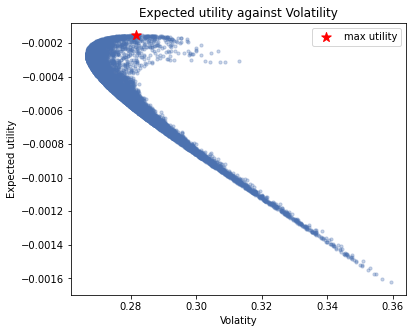

In [27]:
# Plotting  maximum expected utility portfolio using scatter()
plt.subplots(figsize=(6, 5))

#plot of expected returns against risks
plt.scatter(portfolios1['Volatility_opt'], portfolios1['Expected utility'],marker='o', s=10, alpha=0.3)
plt.title('Expected utility against Volatility')
plt.xlabel('Volatity')
plt.ylabel('Expected utility')

#The maximum expected utility portfolio
plt.scatter(max_util[1], max_util[2], color='r', marker='*', s=100,label='max utility')
plt.legend(loc='upper right')
plt.show()
           


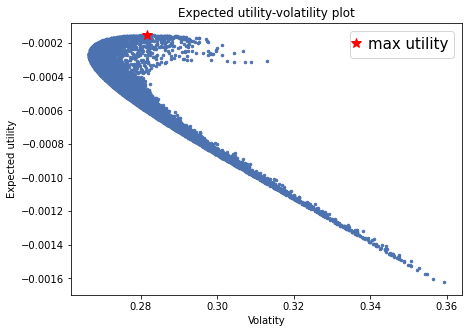

In [28]:
#plotting the maximum expected utility portfolio using plt.plot()

#vilatility array
vol=np.array(p_vol1)
#expected utility array
util1=np.array(util)
plt.figure(figsize=(7,5))

##plot of expected utility against volatility
plt.plot(vol, util1,'.', markersize=5)
plt.title('Expected utility-volatility plot')
plt.xlabel('Volatity')
plt.ylabel('Expected utility')

##maximum expected utility portfolio
plt.plot(max_util[1], max_util[2], color='r', marker='*',  markersize=10,label='max utility')
plt.legend(handlelength=0,prop={'size': 15})
plt.savefig('max utility.pdf')
plt.show()

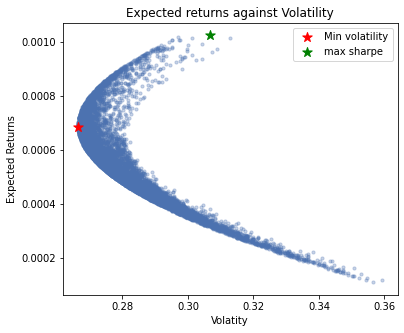

In [29]:
# Plotting optimal risky and minimum volatility portfolios using scatter()
plt.subplots(figsize=(6, 5))

#returns against risks
plt.scatter(portfolios1['Volatility_opt'], portfolios1['Returns_opt'],marker='o', s=10, alpha=0.3)

#minimum volatility portfolio
plt.scatter(min_vol_port1[1], min_vol_port1[0], color='r', marker='*', s=100,label='Min volatility')

#optimal risky portfolio
plt.scatter(optimal_risky_port1[1], optimal_risky_port1[0], color='g', marker='*', s=100,label='max sharpe')
plt.xlabel('Volatity')
plt.ylabel('Expected Returns')
plt.title('Expected returns against Volatility')

plt.legend(loc='upper right')
plt.show()

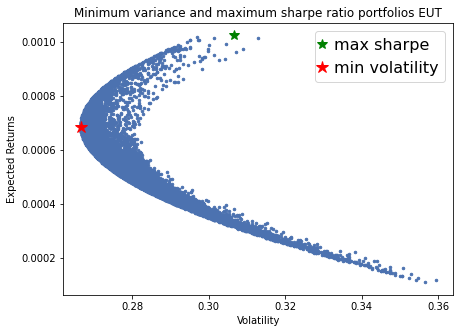

In [30]:
# Plotting optimal risky and minimum volatility portfolios using plt.plot()

##volatility and expected return arrays
vol=np.array(p_vol1)
ret=np.array(p_ret1)
util1=np.array(util)

plt.figure(figsize=(7,5))

#returns against risks
plt.plot(vol,ret,'.',markersize=5)

#optimal risky portfolio
plt.plot(optimal_risky_port1[1], optimal_risky_port1[0], color='g', marker='*',markersize=10,label='max sharpe')

#minimum volatility portfolio
plt.plot(min_vol_port1[1], min_vol_port1[0], color='r', marker='*', markersize=12, label='min volatility')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.title('Minimum variance and maximum sharpe ratio portfolios EUT')
plt.legend(handlelength=0,prop={'size': 16})
plt.savefig('Combined EUT.pdf')
plt.show()